In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('archive (5)/iris.csv')

In [77]:
df.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,versicolor
118,7.7,2.6,6.9,2.3,virginica
20,5.4,3.4,1.7,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
96,5.7,2.9,4.2,1.3,versicolor
6,4.6,3.4,1.4,0.3,setosa
60,5.0,2.0,3.5,1.0,versicolor
131,7.9,3.8,6.4,2.0,virginica


In [4]:
x=df.iloc[:,:-1]
y=df['species']

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)

In [7]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [8]:
xtrain.shape

(120, 4)

In [49]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=4))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))

C:\Users\wasee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()
from sklearn.model_selection import cross_val_score

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75 (300.00 B)

 Trainable params: 75 (300.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
history=model.fit(xtrain,ytrain,validation_split=0.2,batch_size=2,epochs=100)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9377 - loss: 0.3511 - val_accuracy: 0.9167 - val_loss: 0.3196
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8941 - loss: 0.3585 - val_accuracy: 0.9167 - val_loss: 0.3117
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.3589 - val_accuracy: 0.9167 - val_loss: 0.3107
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9038 - loss: 0.3814 - val_accuracy: 0.9167 - val_loss: 0.3094
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9366 - loss: 0.3425 - val_accuracy: 0.9583 - val_loss: 0.3056
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8112 - loss: 0.3949 - val_accuracy: 0.9583 - val_loss: 0.3090
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9039 - loss: 0.3612 - val_accuracy: 0.9167 - val_loss: 0.2965
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9425 - loss: 0.3581 - val_accuracy: 0.9167 - 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

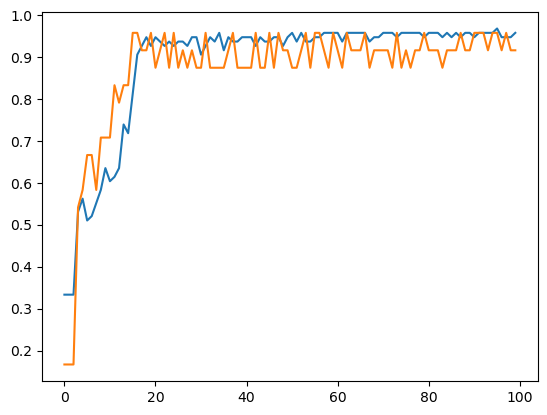

In [40]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

In [67]:
from sklearn.model_selection import cross_val_score

accuracy = model.evaluate(xtest, ytest, verbose=0)

In [69]:
pred=model.predict(xtest).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [71]:
pred


array([2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [73]:
from sklearn.metrics import r2_score
r2_score(pred,ytest)

0.9410609037328094

In [75]:
accuracy

[0.15272799134254456, 0.9666666388511658]